# Documentation/Resources:

1. Paper on [Isolation Forest for Anomaly Detection](http://www.ncsa.illinois.edu/Conferences/LSST18/assets/pdfs/hariri_forest.pdf)
2. [Anomaly Detection Using Isolation Forest in Python](https://blog.paperspace.com/anomaly-detection-isolation-forest/)

Isolation Forest:
- Model free
- Computationally efficient
- Readily applicable to parallelization
- Readily applicable to high dimensional data
- Inconsistent scoring observed in score maps

Extended Isolation Forest:
- Model free
- Computationally efficient
- Readily applicable to parallelization
- Readily applicable to high dimensional data
- Consistent scoring

Overall:
- Open source anomaly detection software package for scientific application using fast and efficient isolation forest
- Fault tolerant, robust, scalable deployment
- Train and scoring using Spark
- Ready-to-deploy infrastructure on Kubernetes
- Production services for large datasets

# Import modules

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import string

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Anomaly detection tools
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Filter out warnings
import warnings
warnings.filterwarnings("ignore")

# Unpickle windfarm df

In [2]:
windfarm2016 = pd.read_pickle("./windfarm2016.pkl")
windfarm2016

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13872,R80736,2016-11-26T20:30:00+01:00,2016-11-26,19:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.040001,16.000000,17.00,0.15,4.21000,4.130000,4.28000,0.030000,25.370001,24.980000,25.680000,0.120000,-0.150000,-0.440000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.440000,0.080000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.889999,19.700001,19.900000,0.04,16.830000,16.799999,17.000000,0.06,21.549999,21.400000,21.600000,0.08,26.100000,26.000000,26.100000,0.01,26.700001,26.700001,26.799999,0.01,25.420000,24.799999,25.600000,0.22,29.200001,29.100000,29.299999,0.01,234.030000,234.030000,234.030000,0.00,15.990000,15.800000,16.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,133.670000,123.090000,143.130000,5.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.37,-110.940000,-90.900002,5.510000,9.00,8.8,9.05,0.02,50.000000,49.959999,50.029999,0.01,695.89001,694.01001,698.37000,0.81,0.000000,0.000000,0.00,0.00,17.299999,17.299999,17.400000,0.01,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,133.670000,NaN,NaN,NaN,133.670000,NaN,NaN,NaN
13875,R80736,2016-11-26T22:30:00+01:00,2016-11-26,21:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.000000,16.000000,16.00,0.00,4.07000,4.030000,4.10000,0.010000,24.190001,23.980000,24.360001,0.060000,-0.130000,-0.430000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.430000,0.070000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.260000,19.100000,19.299999,0.07,16.200001,16.100000,16.200001,0.00,20.500000,20.400000,20.500000,0.01,25.299999,25.250000,25.500000,0.02,25.900000,25.850000,25.900000,0.01,24.570000,24.250000,24.799999,0.08,28.190001,28.100000,28.200001,0.02,234.030000,234.030000,234.030000,0.00,15.830000,15.800000,16.000000,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,150.060000,123.090000,205.460010,25.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.00,-110.930000,-28.559999,25.150000,8.66,8.5,8.75,0.07,50.020000,49.990002,50.040001,0.01,696.19000,693.65002,698.51001,1.47,0.000000,0.000000,0.00,0.00,17.000000,16.950001,17.000000,0.00,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,150.060000,NaN,NaN,NaN,150.060000,NaN,NaN,NaN
13878,R80736,2016-11-30T00:40:00+01:00,2016-11-29,23:40:00,2016,11,45.000000,45.000000,45.000000,0.00,9.000000,9.000000,9.94,0.05,94.43000,73.129997,107.93000,8.530000,28.719999,28.450001,28.969999,0.080000,-1.310000,-1.780000,-0.930000,0.140000,0.000000,0.000000,0.090000,0.000000,1.310000,0.930000,1.780000,0.140000,1.00,1.00,1.00,0.00,90.470001,68.980003,104.04000,8.520001,41.369999,41.200001,41.599998,0.12,35.139999,34.900002,35.500000,0.14,54.889999,54.599998,55.400002,0.21,46.560001,46.400002,46.599998,0.07,47.500000,47.299999,47.700001,0.14,47.549999,47.200001,47.900002,0.15,49.990002,49.799999,50.200001,0.10,81.459999,81.459999,81.459999,0.00,21.459999,2

In [3]:
windfarm = pd.read_pickle("./windfarm.pkl")
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,2017-02-08,07:00:00,2017,2,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,38.369999,17.6800,52.41000,9.390000,2.39,2.06,2.69,0.09,-1.89000,-2.36000,-1.40000,0.150000,0.000000,0.000000,0.000000,0.00,1.89000,1.40000,2.36000,0.15,1.00,1.0,1.00,0.0,38.110001,17.27,51.919998,9.400000,33.410000,33.200001,33.599998,0.14,30.790001,30.600000,30.850000,0.03,45.590000,45.299999,45.799999,0.11,35.360001,35.099998,35.599998,0.15,37.939999,37.799999,38.000000,0.08,34.130001,31.799999,35.700001,1.04,39.580002,39.049999,40.200001,0.40,318.12000,318.12000,318.12000,0.00,20.610001,20.500000,20.799999,0.08,0.14,0.00,1.94,0.44,0.22,0.00,1.93,0.53,0.18,0.00,1.89,0.44,358.049990,298.76999,54.560001,12.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.939999,-19.350000,96.449997,12.05,4.80,4.8,4.90,0.01,50.000000,49.959999,50.029999,0.01,698.40002,696.01001,708.03003,2.40,0.33,0.00,0.49,0.16,19.020000,19.0,19.100000,0.04,-18.889999,-438.32999,0.00000,79.82000,NaN,NaN,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,2017-01-26,01:40:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1204.140000,1195.8101,1208.66000,3.260000,1796.71,1764.35,1816.86,10.58,197.32001,186.07001,200.96001,2.150000,22.200001,16.120001,25.110001,1.04,198.58000,186.92999,202.14999,2.17,0.99,1.0,0.99,0.0,1205.520000,1197.17,1210.060100,3.250000,40.639999,40.200001,41.099998,0.17,29.379999,29.150000,29.600000,0.08,54.580002,53.500000,55.799999,0.37,64.800003,64.550003,65.000000,0.08,64.400002,64.300003,64.599998,0.08,54.959999,54.700001,55.599998,0.12,56.209999,56.000000,56.450001,0.07,63.48000,63.48000,63.48000,0.00,21.900000,21.700001,22.200001,0.13,4.33,3.42,5.54,0.39,5.38,3.74,6.69,0.46,4.85,3.67,6.01,0.39,74.470001,9.47000,108.520000,9.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,-54.009998,45.029999,9.74,-7.16,-7.3,-6.90,0.11,50.009998,49.980000,50.029999,0.01,704.65997,703.42999,705.90002,0.45,11.48,11.37,11.54,0.03,21.610001,21.6,21.799999,0.03,1562.970000,1481.31010,1586.53000,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,2017-01-26,12:50:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1179.860000,1060.6200,1287.86000,49.009998,1662.15,1251.04,2029.50,164.30,176.45000,108.74000,245.96001,29.559999,18.620001,11.780000,24.469999,2.48,177.53000,110.14000,246.80000,29.35,0.99,1.0,0.98,0.0,1181.700000,1062.28,1289.950000,49.110001,49.509998,48.849998,50.099998,0.21,37.349998,37.000000,37.700001,0.13,63.990002,62.599998,65.500000,0.56,66.800003,66.099998,67.349998,0.27,66.290001,65.750000,66.900002,0.34,56.830002,56.450001,57.150002,0.11,58.570000,58.299999,59.049999,0.09,70.07000,70.07000,70.07000,0.00,27.410000,27.299999,27.700001,0.11,4.89,3.64,6.39,0.52,5.19,3.65,6.69,0.52,5.04,3.70,6.38,0.48,73.949997,328.78000,122.340000,13.83,NaN,NaN,NaN,NaN

In [4]:
# Append 2 dfs
windfarm = windfarm2016.append(windfarm)

In [5]:
windfarm['Date_time'] = pd.to_datetime(windfarm.Date_time, utc=True)

# Break up windfarm df into 4 - 1 per Turbine

In [6]:
windfarm.Wind_turbine_name.value_counts()

R80721    107131
R80736    107131
R80711    107131
R80790    106987
Name: Wind_turbine_name, dtype: int64

In [7]:
wf_R80721 = windfarm[windfarm['Wind_turbine_name']== 'R80721'].reset_index()

In [8]:
wf_R80721 = wf_R80721.drop(columns=['index'])

In [9]:
wf_R80711 = windfarm[windfarm['Wind_turbine_name']== 'R80711'].reset_index()

In [10]:
wf_R80711 = wf_R80711.drop(columns=['index'])

In [11]:
wf_R80736 = windfarm[windfarm['Wind_turbine_name']== 'R80736'].reset_index()

In [12]:
wf_R80736 = wf_R80736.drop(columns=['index'])

In [13]:
wf_R80790 = windfarm[windfarm['Wind_turbine_name']== 'R80790'].reset_index()

In [14]:
wf_R80790 = wf_R80790.drop(columns=['index'])

# Isolation Forest

- A negative score value and a -1 for the value of anomaly columns indicate the presence of an anomaly. 

- A value of 1 for the anomaly represents normal data.

## Internal Elements: 

Ba	Pitch_angle	deg	
Cm	Converter_torque	Nm	
Cosphi	Power_factor		(Should equal P/S)
DCs	Generator_converter_speed	rpm	
Db1t	Generator_bearing_1_temperature	deg_C	
Db2t	Generator_bearing_2_temperature	deg_C	
Ds	Generator_speed	rpm	
Dst	Generator_stator_temperature	deg_C	
Gb1t	Gearbox_bearing_1_temperature	deg_C	
Gb2t	Gearbox_bearing_2_temperature	deg_C	
Git	Gearbox_inlet_temperature	deg_C	
Gost	Gearbox_oil_sump_temperature	deg_C	
Na_c	Nacelle_angle_corrected	deg	
Nf	Grid_frequency	Hz	
Nu	Grid_voltage	V	
Pas	Pitch_angle_setpoint		
Q	Reactive_power	kVAr	
Rbt	Rotor_bearing_temperature	deg_C	
Rm	Torque	Nm	
Rs	Rotor_speed	rpm	
Rt	Hub_temperature	deg_C	
S	Apparent_power	kVA	(Should be the square root of the sum of P square and Q square)
Va	Vane_position	deg	
Va1	Vane_position_1	deg (First wind vane on the nacelle)
Va2	Vane_position_2	deg	(Second wind vane on the nacelle)
Ya	Nacelle_angle	deg	
Yt	Nacelle_temperature	deg_C

- **P	Active_power	kW** - See Below (Model output)



## External Elements:
- These are independent from wind turbine internal status.
    
    - Wind:

        - Wa	Absolute_wind_direction	deg	
        - Wa_c	Absolute_wind_direction_corrected	deg	
        - Ws	Wind_speed	m/s	Average wind speed
        - Ws1	Wind_speed_1	m/s	First anemometer on the nacelle
        - Ws2	Wind_speed_2	m/s	Second anemometer on the nacelle

    - External Temperature:

        - Ot	Outdoor_temperature	deg_C	

## Model output:

- **P	Active_power	kW** See above (Internal Elements)

### Internal Elements:

Electricity:

- Nf Grid_frequency Hz
- Nu Grid_voltage V

Powers:

- P Active_power kW - See Below (Model output)
- Q Reactive_power kVAr
- Cosphi Power_factor Should equal P/S DCs Generator_converter_speed rpm
- S Apparent_power kVA Should be the square root of the sum of P square and Q square 


Temps:

- Yt Nacelle_temperature deg_C
- Rt Hub_temperature deg_C
- Dst Generator_stator_temperature deg_C
- Gb1t Gearbox_bearing_1_temperature deg_C
- Gb2t Gearbox_bearing_2_temperature deg_C
- Db1t Generator_bearing_1_temperature deg_C
- Db2t Generator_bearing_2_temperature deg_C
- Git Gearbox_inlet_temperature deg_C
- Gost Gearbox_oil_sump_temperature deg_C
- Rbt Rotor_bearing_temperature deg_C


Speeds:

- Rs Rotor_speed rpm
- Ds Generator_speed rpm

Torque:

- Cm Converter_torque Nm
- Rm Torque Nm


Angles/Degrees:

- Ba Pitch_angle deg
- Na_c Nacelle_angle_corrected deg
- Va Vane_position deg
- Va1 Vane_position_1 deg First wind vane on the nacelle 
- Va2 Vane_position_2 deg Second wind vane on the nacelle 
- Ya Nacelle_angle deg
- Pas Pitch_angle_setpoint





### Factors that increase anomalies in IsolationForest:

1. Increasing contamination float
2. Increasing n_estimators
    - Increasing n_estimators also increases the time it takes the model to run 


#### Explanation of [Isolation Forest Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

### wf_R80721 Specify Internal Power/Electricity Elements to be modeled

In [15]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=6, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [16]:
clf.fit(wf_R80721[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=6, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [17]:
elec_power_pred = clf.predict(wf_R80721[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [18]:
elec_power_df = pd.DataFrame({'Elec_Power_Anomalies': elec_power_pred})

In [19]:
wf_R80721[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()

,Nf_avg,Nu_avg,P_avg,Q_avg,Cosphi_avg,S_avg
0,50.020000,698.90997,317.260010,40.500000,0.99,320.56000
1,50.009998,702.92999,1244.670000,99.870003,1.00,1249.18010
2,50.009998,689.76001,-3.330000,0.000000,1.00,3.33000
3,49.990002,697.14001,440.390010,29.700001,1.00,441.45001
5,50.020000,691.77002,89.760002,21.410000,0.98,93.00000
...,...,...,...,...,...,...
107126,49.960000,716.27000,1632.280000,141.780000,0.99,1639.28000
107127,50.000000,709.20000,1940.510000,177.570000,1.00,1948.76000
107128,50.000000,701.74000,1417.710000,143.310000,0.99,1425.48000
107129,50.040000,696.59000,1266.860000,97.180000,1.00,1271.21000


In [20]:
elec_power_metrics = elec_power_df.join(wf_R80721[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [21]:
elec_power_outliers=elec_power_metrics.loc[elec_power_metrics['Elec_Power_Anomalies']==-1]
elec_power_outliers_index=list(elec_power_outliers.index)

In [22]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(elec_power_metrics['Elec_Power_Anomalies'].value_counts())

 1    104924
-1      1060
Name: Elec_Power_Anomalies, dtype: int64


### Plot the elec/power outliers vs. normal points

In [23]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [24]:
#normalize the metrics
X1 = scaler.fit_transform(wf_R80721[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())
X_reduce1 = pca.fit_transform(X1)

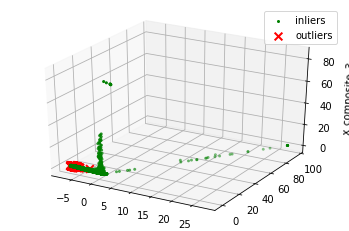

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce1[:, 0], X_reduce1[:, 1], zs=X_reduce1[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce1[elec_power_outliers_index,0],X_reduce1[elec_power_outliers_index,1], X_reduce1[elec_power_outliers_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [26]:
# plot to 2D
pca = PCA(2)

In [27]:
pca.fit(wf_R80721[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
res1=pd.DataFrame(pca.transform(wf_R80721[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()))
Z1 = np.array(res1)

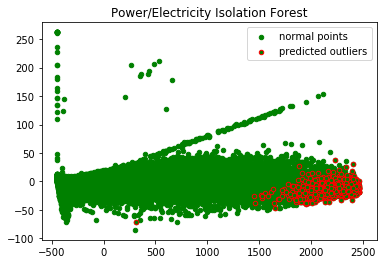

In [29]:
plt.title("Power/Electricity Isolation Forest")
b1 = plt.scatter(res1[0], res1[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res1.iloc[elec_power_outliers_index,0],res1.iloc[elec_power_outliers_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

### wf_R80711 Specify Internal Power/Electricity Elements to be modeled

In [30]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=6, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [31]:
clf.fit(wf_R80711[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=6, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [32]:
elec_power_pred = clf.predict(wf_R80711[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [33]:
elec_power_df = pd.DataFrame({'Elec_Power_Anomalies': elec_power_pred})

In [34]:
wf_R80711[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()

,Nf_avg,Nu_avg,P_avg,Q_avg,Cosphi_avg,S_avg
0,49.990002,701.38000,606.21997,9.93,1.00,606.48999
1,50.009998,706.42999,387.73001,19.02,1.00,388.26001
2,49.970001,698.84003,389.45999,13.34,1.00,389.76999
3,50.009998,697.32001,299.44000,12.99,1.00,299.76999
4,50.009998,691.71997,219.07001,13.26,1.00,219.50000
...,...,...,...,...,...,...
107114,49.950000,701.38000,208.27000,16.32,1.00,208.98000
107115,50.000000,707.09000,12.98000,38.90,1.00,41.36000
107116,49.970000,707.29000,4.86000,34.87,1.00,35.51000
107117,50.000000,708.16000,11.80000,37.22,1.00,39.87000


In [35]:
elec_power_metrics = elec_power_df.join(wf_R80711[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [36]:
elec_power_outliers=elec_power_metrics.loc[elec_power_metrics['Elec_Power_Anomalies']==-1]
elec_power_outliers_index=list(elec_power_outliers.index)

In [37]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(elec_power_metrics['Elec_Power_Anomalies'].value_counts())

 1    104903
-1      1060
Name: Elec_Power_Anomalies, dtype: int64


### Plot the elec/power outliers vs. normal points

In [38]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [39]:
#normalize the metrics
X1 = scaler.fit_transform(wf_R80711[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())
X_reduce1 = pca.fit_transform(X1)

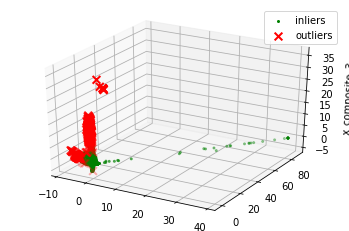

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce1[:, 0], X_reduce1[:, 1], zs=X_reduce1[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce1[elec_power_outliers_index,0],X_reduce1[elec_power_outliers_index,1], X_reduce1[elec_power_outliers_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [41]:
# plot to 2D
pca = PCA(2)

In [42]:
pca.fit(wf_R80711[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
res1=pd.DataFrame(pca.transform(wf_R80711[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()))
Z1 = np.array(res1)

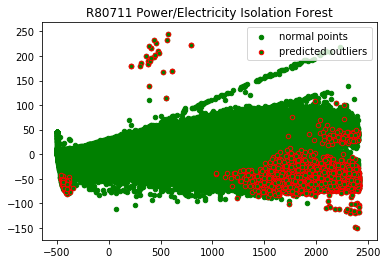

In [249]:
plt.title("R80711 Power/Electricity Isolation Forest")
b1 = plt.scatter(res1[0], res1[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res1.iloc[elec_power_outliers_index,0],res1.iloc[elec_power_outliers_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

### wf_R80736 Specify Internal Power/Electricity Elements to be modeled

In [45]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=6, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [46]:
clf.fit(wf_R80736[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=6, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [47]:
elec_power_pred = clf.predict(wf_R80736[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [48]:
elec_power_df = pd.DataFrame({'Elec_Power_Anomalies': elec_power_pred})

In [49]:
wf_R80736[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()

,Nf_avg,Nu_avg,P_avg,Q_avg,Cosphi_avg,S_avg
0,50.00,695.89001,-0.15,0.000000,1.00,0.15
1,50.02,696.19000,-0.13,0.000000,1.00,0.13
2,49.98,698.31000,-1.31,0.000000,1.00,1.31
3,50.00,698.95001,106.71,18.030001,0.98,108.28
4,49.98,699.21997,34.50,18.910000,1.00,40.02
...,...,...,...,...,...,...
107126,49.99,704.88000,0.00,0.000000,1.00,1.76
107127,50.00,701.10000,196.41,35.630000,0.97,200.35
107128,49.99,702.32000,0.00,8.100000,1.00,12.39
107129,49.98,702.20000,0.00,0.000000,1.00,0.85


In [50]:
elec_power_metrics = elec_power_df.join(wf_R80736[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [51]:
elec_power_outliers=elec_power_metrics.loc[elec_power_metrics['Elec_Power_Anomalies']==-1]
elec_power_outliers_index=list(elec_power_outliers.index)

In [52]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(elec_power_metrics['Elec_Power_Anomalies'].value_counts())

 1    103757
-1      1049
Name: Elec_Power_Anomalies, dtype: int64


### Plot the elec/power outliers vs. normal points

In [53]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [54]:
#normalize the metrics
X1 = scaler.fit_transform(wf_R80736[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())
X_reduce1 = pca.fit_transform(X1)

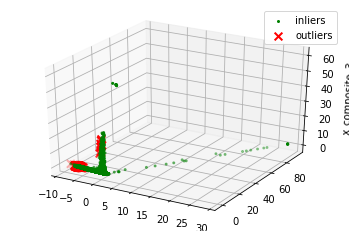

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce1[:, 0], X_reduce1[:, 1], zs=X_reduce1[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce1[elec_power_outliers_index,0],X_reduce1[elec_power_outliers_index,1], X_reduce1[elec_power_outliers_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [56]:
# plot to 2D
pca = PCA(2)

In [57]:
pca.fit(wf_R80736[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
res1=pd.DataFrame(pca.transform(wf_R80736[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()))
Z1 = np.array(res1)

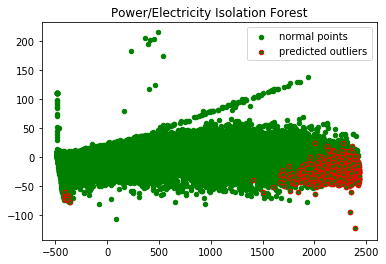

In [59]:
plt.title("Power/Electricity Isolation Forest")
b1 = plt.scatter(res1[0], res1[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res1.iloc[elec_power_outliers_index,0],res1.iloc[elec_power_outliers_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

### wf_R80790 Specify Internal Power/Electricity Elements to be modeled

In [60]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=6, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [61]:
clf.fit(wf_R80790[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=6, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [62]:
elec_power_pred = clf.predict(wf_R80790[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [63]:
elec_power_df = pd.DataFrame({'Elec_Power_Anomalies': elec_power_pred})

In [64]:
wf_R80790[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()

,Nf_avg,Nu_avg,P_avg,Q_avg,Cosphi_avg,S_avg
0,50.000000,690.01001,48.610001,24.760000,0.99,56.59000
1,50.000000,701.94000,269.959990,33.930000,0.99,272.12000
2,49.970001,694.94000,222.670000,36.099998,0.98,225.81000
3,49.990002,689.69000,142.030000,25.590000,0.98,144.39999
4,49.959999,695.34003,-2.380000,0.000000,1.00,2.38000
...,...,...,...,...,...,...
106982,49.980000,695.05000,256.050000,31.110000,0.99,258.45000
106983,49.970000,693.42000,466.740000,33.080000,1.00,468.19000
106984,50.030000,696.67000,90.440000,23.430000,0.96,93.63000
106985,49.970000,692.88000,267.900000,28.040000,0.99,269.40000


In [65]:
elec_power_metrics = elec_power_df.join(wf_R80790[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [66]:
elec_power_outliers=elec_power_metrics.loc[elec_power_metrics['Elec_Power_Anomalies']==-1]
elec_power_outliers_index=list(elec_power_outliers.index)

In [67]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(elec_power_metrics['Elec_Power_Anomalies'].value_counts())

 1    104020
-1      1050
Name: Elec_Power_Anomalies, dtype: int64


### Plot the elec/power outliers vs. normal points

In [68]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [69]:
#normalize the metrics
X1 = scaler.fit_transform(wf_R80790[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())
X_reduce1 = pca.fit_transform(X1)

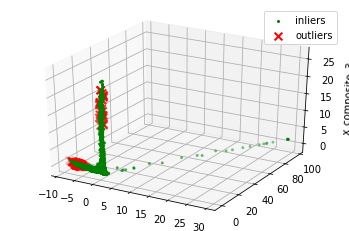

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce1[:, 0], X_reduce1[:, 1], zs=X_reduce1[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce1[elec_power_outliers_index,0],X_reduce1[elec_power_outliers_index,1], X_reduce1[elec_power_outliers_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [71]:
# plot to 2D
pca = PCA(2)

In [72]:
pca.fit(wf_R80790[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [73]:
res1=pd.DataFrame(pca.transform(wf_R80790[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()))
Z1 = np.array(res1)

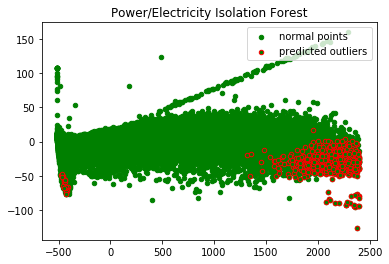

In [74]:
plt.title("Power/Electricity Isolation Forest")
b1 = plt.scatter(res1[0], res1[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res1.iloc[elec_power_outliers_index,0],res1.iloc[elec_power_outliers_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

# Specify Overall Windfarm Internal Power/Electricity Elements to be modeled

In [75]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=6, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [76]:
clf.fit(windfarm[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=6, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [77]:
elec_power_pred = clf.predict(windfarm[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [78]:
elec_power_df = pd.DataFrame({'Elec_Power_Anomalies': elec_power_pred})

In [79]:
elec_power_df

,Elec_Power_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
421818,-1
421819,1
421820,1
421821,1


In [80]:
windfarm[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()

,Nf_avg,Nu_avg,P_avg,Q_avg,Cosphi_avg,S_avg
13872,50.00,695.89001,-0.15,0.000000,1.00,0.15
13875,50.02,696.19000,-0.13,0.000000,1.00,0.13
13878,49.98,698.31000,-1.31,0.000000,1.00,1.31
13881,50.00,698.95001,106.71,18.030001,0.98,108.28
13884,49.98,699.21997,34.50,18.910000,1.00,40.02
...,...,...,...,...,...,...
217583,49.96,716.27000,1632.28,141.780000,0.99,1639.28
217584,50.00,709.20000,1940.51,177.570000,1.00,1948.76
217585,50.00,701.74000,1417.71,143.310000,0.99,1425.48
217586,50.04,696.59000,1266.86,97.180000,1.00,1271.21


In [81]:
elec_power_metrics = elec_power_df.join(windfarm[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

In [82]:
elec_power_metrics

,Elec_Power_Anomalies,Nf_avg,Nu_avg,P_avg,Q_avg,Cosphi_avg,S_avg
0,1,50.000000,698.40002,-1.89000,0.000000,1.00,1.89000
1,1,50.009998,704.65997,197.32001,22.200001,0.99,198.58000
2,1,50.000000,704.53003,176.45000,18.620001,0.99,177.53000
3,1,50.009998,705.90002,190.61000,21.770000,0.99,191.96001
4,1,49.970001,701.59003,-2.88000,0.000000,1.00,2.89000
...,...,...,...,...,...,...,...
421818,-1,NaN,NaN,NaN,NaN,NaN,NaN
421819,1,NaN,NaN,NaN,NaN,NaN,NaN
421820,1,NaN,NaN,NaN,NaN,NaN,NaN
421821,1,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
elec_power_outliers=elec_power_metrics.loc[elec_power_metrics['Elec_Power_Anomalies']==-1]
elec_power_outliers_index=list(elec_power_outliers.index)

In [84]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(elec_power_metrics['Elec_Power_Anomalies'].value_counts())

 1    462126
-1      4655
Name: Elec_Power_Anomalies, dtype: int64


### Plot the elec/power outliers vs. normal points

In [85]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [86]:
#normalize the metrics
X1 = scaler.fit_transform(windfarm[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())
X_reduce1 = pca.fit_transform(X1)

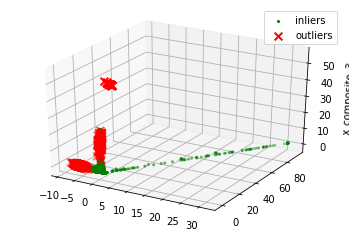

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce1[:, 0], X_reduce1[:, 1], zs=X_reduce1[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce1[elec_power_outliers_index,0],X_reduce1[elec_power_outliers_index,1], X_reduce1[elec_power_outliers_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [88]:
# plot to 2D
pca = PCA(2)

In [89]:
pca.fit(windfarm[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
res1=pd.DataFrame(pca.transform(windfarm[['Nf_avg','Nu_avg','P_avg','Q_avg','Cosphi_avg','S_avg']].dropna()))
Z1 = np.array(res1)

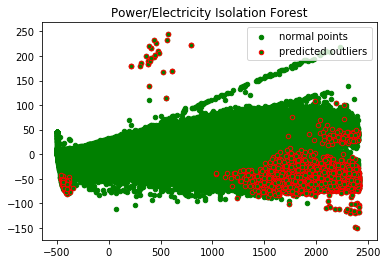

In [91]:
plt.title("Power/Electricity Isolation Forest")
b1 = plt.scatter(res1[0], res1[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res1.iloc[elec_power_outliers_index,0],res1.iloc[elec_power_outliers_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

### Specify the Temperatures metric column names to be modeled

In [92]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=10, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [93]:
clf.fit(windfarm[['Yt_avg','Rt_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Db1t_avg','Db2t_avg','Git_avg','Gost_avg','Rbt_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=10, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [94]:
score3=clf.decision_function(windfarm[['Yt_avg','Rt_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Db1t_avg','Db2t_avg','Git_avg','Gost_avg','Rbt_avg']].dropna())
pred3=clf.predict(windfarm[['Yt_avg','Rt_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Db1t_avg','Db2t_avg','Git_avg','Gost_avg','Rbt_avg']].dropna())

In [95]:
score3.shape, pred3.shape

((425153,), (425153,))

In [96]:
(windfarm[['Yt_avg','Rt_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Db1t_avg','Db2t_avg','Git_avg','Gost_avg','Rbt_avg']].dropna()).shape

(425153, 10)

In [97]:
temp_averages = windfarm[['Yt_avg','Rt_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Db1t_avg','Db2t_avg','Git_avg','Gost_avg','Rbt_avg']].dropna()

In [98]:
temp_score_pred = pd.DataFrame({'Anomalies': pred3, 'Scores': score3})

In [99]:
# append temp_score_pred and temp_averages
temp_df = temp_averages.join(temp_score_pred)

In [100]:
temp_df

,Yt_avg,Rt_avg,Dst_avg,Gb1t_avg,Gb2t_avg,Db1t_avg,Db2t_avg,Git_avg,Gost_avg,Rbt_avg,Anomalies,Scores
0,20.610001,14.00,45.590000,35.360001,37.939999,33.410000,30.790001,34.130001,39.580002,19.020000,1.0,-0.158963
1,21.900000,10.00,54.580002,64.800003,64.400002,40.639999,29.379999,54.959999,56.209999,21.610001,1.0,-0.162960
2,27.410000,10.00,63.990002,66.800003,66.290001,49.509998,37.349998,56.830002,58.570000,23.000000,1.0,0.030151
3,22.549999,10.00,52.959999,66.309998,65.989998,37.939999,31.129999,56.480000,58.610001,22.700001,1.0,0.059205
4,26.330000,17.00,46.090000,44.180000,44.369999,37.430000,30.790001,44.820000,45.540001,23.209999,1.0,0.051756
...,...,...,...,...,...,...,...,...,...,...,...,...
840368,29.760000,19.00,60.259998,51.529999,50.450001,44.169998,40.099998,48.919998,49.430000,23.020000,NaN,NaN
840370,28.200001,19.00,54.439999,61.849998,59.150002,38.930000,35.849998,51.480000,51.900002,25.010000,NaN,NaN
840372,27.120001,19.01,64.739998,62.439999,59.840000,47.540001,39.740002,54.950001,55.419998,26.360001,NaN,NaN
840375,14.380000,19.00,63.740002,73.349998,71.080002,30.549999,31.410000,46.369999,53.880001,28.100000,NaN,NaN


In [101]:
outliers3=temp_df.loc[temp_df['Anomalies']==-1]
temp_outlier_index3=list(outliers3.index)

In [102]:
#print(outlier_index3)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(temp_df['Anomalies'].value_counts())

 1.0    306507
-1.0      1833
Name: Anomalies, dtype: int64


#### 3D Plot for Temperature Metrics - Outliers vs. Normal Points


In [103]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [104]:
#normalize the metrics
X2 = scaler.fit_transform(windfarm[['Yt_avg','Rt_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Db1t_avg','Db2t_avg','Git_avg','Gost_avg','Rbt_avg']].dropna())
X_reduce2 = pca.fit_transform(X2)

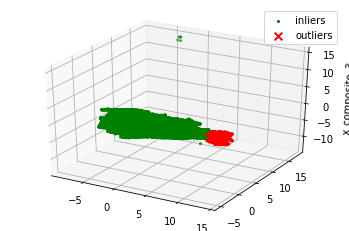

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce2[:, 0], X_reduce2[:, 1], zs=X_reduce2[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce2[temp_outlier_index3,0],X_reduce2[temp_outlier_index3,1], X_reduce2[temp_outlier_index3,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [106]:
# plot to 2D
pca = PCA(2)

In [107]:
pca.fit(windfarm[['Yt_avg','Rt_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Db1t_avg','Db2t_avg','Git_avg','Gost_avg','Rbt_avg']].dropna())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
res2=pd.DataFrame(pca.transform(windfarm[['Yt_avg','Rt_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Db1t_avg','Db2t_avg','Git_avg','Gost_avg','Rbt_avg']].dropna()))
Z2 = np.array(res2)

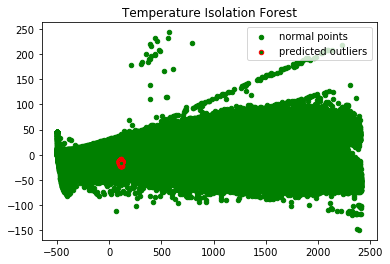

In [109]:
plt.title("Temperature Isolation Forest")
b1 = plt.scatter(res1[0], res1[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res2.iloc[temp_outlier_index3,0],res2.iloc[temp_outlier_index3,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

### Specify Internal Speed/Torque Elements to be modeled

In [110]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=4, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [111]:
clf.fit(windfarm[['Rs_avg','Ds_avg','Cm_avg','Rm_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=4, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [112]:
speed_torq_pred = clf.predict(windfarm[['Rs_avg','Ds_avg','Cm_avg','Rm_avg']].dropna())

In [113]:
speed_torq_df = pd.DataFrame({'Speed_torque_Anomalies': speed_torq_pred})

In [114]:
speed_torq_df

,Speed_torque_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
421597,1
421598,-1
421599,1
421600,1


In [115]:
windfarm[['Rs_avg','Ds_avg','Cm_avg','Rm_avg']].dropna()

,Rs_avg,Ds_avg,Cm_avg,Rm_avg
13872,0.000000,0.000000,25.370001,0.00000
13875,0.000000,0.000000,24.190001,0.00000
13878,0.860000,90.470001,28.719999,-139.71001
13881,9.970000,1047.170000,1256.170000,972.20001
13884,9.229999,970.280030,635.330020,339.54001
...,...,...,...,...
217583,17.140000,1796.350000,8684.330000,8669.70000
217584,17.180000,1800.360000,10328.000000,10289.20000
217585,17.150000,1796.650000,7553.160000,7531.80000
217586,17.140000,1796.410000,6745.680000,6726.64000


In [116]:
speed_torque_metrics = speed_torq_df.join(windfarm[['Rs_avg','Ds_avg','Cm_avg','Rm_avg']].dropna())

In [117]:
speed_torque_metrics

,Speed_torque_Anomalies,Rs_avg,Ds_avg,Cm_avg,Rm_avg
0,1,0.33,38.110001,2.3900,-18.889999
1,1,11.48,1205.520000,1796.7100,1562.970000
2,1,11.25,1181.700000,1662.1500,1418.660000
3,1,11.43,1200.480000,1732.6600,1497.980000
4,1,1.52,159.929990,2.4200,-172.480000
...,...,...,...,...,...
421597,1,NaN,NaN,NaN,NaN
421598,-1,17.18,1799.960000,5847.4502,5858.799800
421599,1,NaN,NaN,NaN,NaN
421600,1,NaN,NaN,NaN,NaN


In [118]:
speed_torq_outliers=speed_torque_metrics.loc[speed_torque_metrics['Speed_torque_Anomalies']==-1]
speed_torq_outliers_index=list(speed_torq_outliers.index)

In [119]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(speed_torque_metrics['Speed_torque_Anomalies'].value_counts())

 1    461884
-1      4628
Name: Speed_torque_Anomalies, dtype: int64


### Plot the speed/torque outliers vs. normal points

In [120]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [121]:
#normalize the metrics
X3 = scaler.fit_transform(windfarm[['Rs_avg','Ds_avg','Cm_avg','Rm_avg']].dropna())
X_reduce3 = pca.fit_transform(X3)

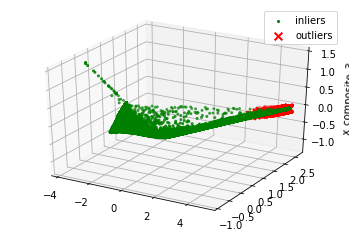

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce3[:, 0], X_reduce3[:, 1], zs=X_reduce3[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce3[speed_torq_outliers_index,0],X_reduce3[speed_torq_outliers_index,1], X_reduce3[speed_torq_outliers_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [123]:
# plot to 2D
pca = PCA(2)

In [124]:
pca.fit(windfarm[['Rs_avg','Ds_avg','Cm_avg','Rm_avg']].dropna())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [125]:
res3=pd.DataFrame(pca.transform(windfarm[['Rs_avg','Ds_avg','Cm_avg','Rm_avg']].dropna()))
Z3=np.array(res3)

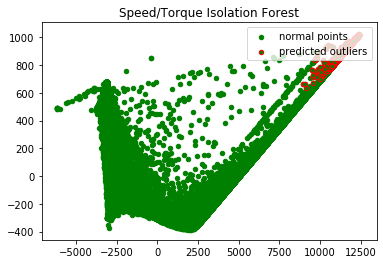

In [126]:
plt.title("Speed/Torque Isolation Forest")
b1 = plt.scatter(res3[0], res3[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res3.iloc[speed_torq_outliers_index,0],res3.iloc[speed_torq_outliers_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

### Specify Pitch Angle & Nacelle_angle_corrected (Degrees) Element to be modeled

Blade pitch or simply pitch refers to turning the angle of attack of the blades of a propeller or helicopter rotor into or out of the wind to control the production or absorption of power.

Wind turbines use this to adjust the rotation speed and the generated power.


In [127]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [128]:
clf.fit(windfarm[['Ba_avg','Na_c_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [129]:
pitch_nac_pred = clf.predict(windfarm[['Ba_avg','Na_c_avg']].dropna())

In [130]:
pitch_nac_df = pd.DataFrame({'Pitch_Nac_Anomalies': pitch_nac_pred})

In [131]:
pitch_nac_df

,Pitch_Nac_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
243416,1
243417,1
243418,1
243419,1


In [132]:
windfarm[['Ba_avg','Na_c_avg']].dropna()

,Ba_avg,Na_c_avg
13872,90.00,133.670000
13875,90.00,150.060000
13878,45.00,125.340000
13881,-0.99,179.340000
13884,-0.22,176.120000
...,...,...
217246,-0.99,61.630001
217255,-0.99,154.509990
217267,-0.99,214.590000
217330,-0.99,176.050000


In [133]:
pitch_nac_metrics = pitch_nac_df.join(windfarm[['Ba_avg','Na_c_avg']].dropna())

In [134]:
pitch_nac_metrics

,Pitch_Nac_Anomalies,Ba_avg,Na_c_avg
0,1,44.990002,358.04999
1,1,NaN,NaN
2,1,NaN,NaN
3,1,NaN,NaN
4,1,44.990002,7.99000
...,...,...,...
243416,1,NaN,NaN
243417,1,NaN,NaN
243418,1,NaN,NaN
243419,1,-0.990000,287.16000


In [135]:
pitch_nac_outliers=pitch_nac_metrics.loc[pitch_nac_metrics['Pitch_Nac_Anomalies']==-1]
pitch__nac_outliers_index=list(pitch_nac_outliers.index)

In [136]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(pitch_nac_metrics['Pitch_Nac_Anomalies'].value_counts())

 1    248018
-1      2488
Name: Pitch_Nac_Anomalies, dtype: int64


### Plot the Pitch &  Nacelle angle outliers vs. normal points

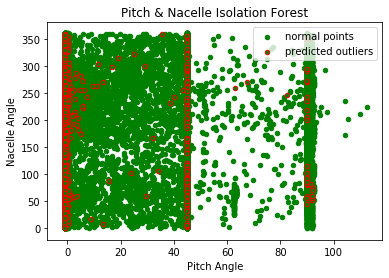

In [137]:
plt.title("Pitch & Nacelle Isolation Forest")
b1 = plt.scatter(pitch_nac_metrics['Ba_avg'].loc[pitch_nac_metrics['Pitch_Nac_Anomalies']==1], pitch_nac_metrics['Na_c_avg'].loc[pitch_nac_metrics['Pitch_Nac_Anomalies']==1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(pitch_nac_metrics['Ba_avg'].loc[pitch_nac_metrics['Pitch_Nac_Anomalies']==-1],pitch_nac_metrics['Na_c_avg'].loc[pitch_nac_metrics['Pitch_Nac_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Pitch Angle')
plt.ylabel('Nacelle Angle')
plt.show()

### Specify Nacelle angle (corrected) & Vane position (Degrees) Element to be modeled

In [138]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [139]:
clf.fit(windfarm[['Va_avg','Na_c_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [140]:
nac_vane_pred = clf.predict(windfarm[['Va_avg','Na_c_avg']].dropna())

In [141]:
nac_vane_df = pd.DataFrame({'Nac_Vane_Anomalies': nac_vane_pred})

In [142]:
nac_vane_df

,Nac_Vane_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
243416,1
243417,1
243418,1
243419,1


In [143]:
windfarm[['Va_avg','Na_c_avg']].dropna()

,Va_avg,Na_c_avg
13872,-100.37,133.670000
13875,-84.00,150.060000
13878,43.91,125.340000
13881,13.35,179.340000
13884,10.14,176.120000
...,...,...
217246,9.79,61.630001
217255,14.88,154.509990
217267,18.98,214.590000
217330,1.29,176.050000


In [144]:
nac_vane_metrics = nac_vane_df.join(windfarm[['Va_avg','Na_c_avg']].dropna())

In [145]:
nac_vane_metrics

,Nac_Vane_Anomalies,Va_avg,Na_c_avg
0,1,39.939999,358.04999
1,1,NaN,NaN
2,1,NaN,NaN
3,1,NaN,NaN
4,1,8.180000,7.99000
...,...,...,...
243416,1,NaN,NaN
243417,1,NaN,NaN
243418,1,NaN,NaN
243419,1,1.560000,287.16000


In [146]:
nac_vane_outliers=nac_vane_metrics.loc[nac_vane_metrics['Nac_Vane_Anomalies']==-1]
nac_vane_outliers_index=list(nac_vane_outliers.index)

In [147]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(nac_vane_metrics['Nac_Vane_Anomalies'].value_counts())

 1    248001
-1      2505
Name: Nac_Vane_Anomalies, dtype: int64


### Plot the Nacelle & Vane angle outliers vs. normal points

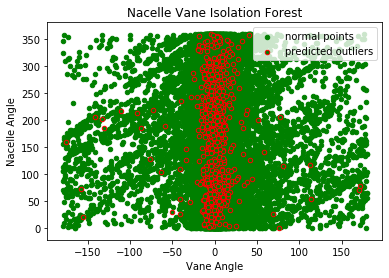

In [148]:
plt.title("Nacelle Vane Isolation Forest")
b1 = plt.scatter(nac_vane_metrics['Va_avg'].loc[nac_vane_metrics['Nac_Vane_Anomalies']==1], nac_vane_metrics['Na_c_avg'].loc[nac_vane_metrics['Nac_Vane_Anomalies']==1], c='green',s=20,label="normal points")
b1 =plt.scatter(nac_vane_metrics['Va_avg'].loc[nac_vane_metrics['Nac_Vane_Anomalies']==-1], nac_vane_metrics['Na_c_avg'].loc[nac_vane_metrics['Nac_Vane_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Vane Angle')
plt.ylabel('Nacelle Angle')
plt.show()

### Specify Vane positions 1 & 2 (Degrees) Elements to be modeled

In [149]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [150]:
clf.fit(windfarm[['Va1_avg','Va2_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [151]:
vanes_pred = clf.predict(windfarm[['Va1_avg','Va2_avg']].dropna())

In [152]:
vanes_df = pd.DataFrame({'Vanes_Anomalies': vanes_pred})

In [153]:
vanes_df

,Vanes_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
138502,1
138503,1
138504,1
138505,1


In [154]:
windfarm[['Va1_avg','Va2_avg']].dropna()

,Va1_avg,Va2_avg
52,-0.84,-0.84
62,10.16,10.16
74,-6.65,-6.65
78,-2.85,-2.85
102,-3.40,-3.40
...,...,...
217583,-5.23,-5.23
217584,-0.08,-0.08
217585,2.15,2.15
217586,1.61,1.61


In [155]:
vanes_metrics = vanes_df.join(windfarm[['Va1_avg','Va2_avg']].dropna())

In [156]:
vanes_metrics

,Vanes_Anomalies,Va1_avg,Va2_avg
0,1,NaN,NaN
1,1,NaN,NaN
2,1,NaN,NaN
3,1,NaN,NaN
4,1,NaN,NaN
...,...,...,...
138502,1,NaN,NaN
138503,1,0.20,0.20
138504,1,-14.61,-14.61
138505,1,NaN,NaN


In [157]:
vanes_outliers=vanes_metrics.loc[vanes_metrics['Vanes_Anomalies']==-1]
vanes_outliers_index=list(vanes_outliers.index)

In [158]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(vanes_metrics['Vanes_Anomalies'].value_counts())

 1    137297
-1      1210
Name: Vanes_Anomalies, dtype: int64


### Plot the 2 Vane angle's outliers vs. normal points

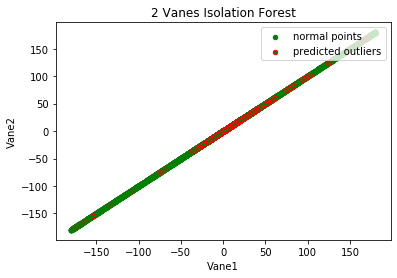

In [159]:
plt.title("2 Vanes Isolation Forest")
b1 = plt.scatter(vanes_metrics['Va1_avg'].loc[vanes_metrics['Vanes_Anomalies']==1], vanes_metrics['Va2_avg'].loc[vanes_metrics['Vanes_Anomalies']==1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(vanes_metrics['Va1_avg'].loc[vanes_metrics['Vanes_Anomalies']==-1], vanes_metrics['Va2_avg'].loc[vanes_metrics['Vanes_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Vane1')
plt.ylabel('Vane2')
plt.show()

## Compare output power vs. pitch angle for each turbine


- Divide windfarm df into 4 dfs:

In [160]:
wf_R80790 = windfarm[windfarm['Wind_turbine_name']=='R80790'].sort_values(by='Date_time').reset_index()

In [161]:
wf_R80721 = windfarm[windfarm['Wind_turbine_name']=='R80721'].sort_values(by='Date_time').reset_index()

In [162]:
wf_R80711 = windfarm[windfarm['Wind_turbine_name']=='R80711'].sort_values(by='Date_time').reset_index()

In [163]:
wf_R80736 = windfarm[windfarm['Wind_turbine_name']=='R80736'].sort_values(by='Date_time').reset_index()

### Starting with: wf_R80790

In [164]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [165]:
clf.fit(wf_R80790[['Ba_avg','P_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [166]:
wf_R80790_power_pitch_pred = clf.predict(wf_R80790[['Ba_avg','P_avg']].dropna())

In [167]:
wf_R80790_pitch_df = pd.DataFrame({'wf_R80790_Power_Pitch_Anomalies': wf_R80790_power_pitch_pred})

In [168]:
wf_R80790_pitch_df

,wf_R80790_Power_Pitch_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
106482,1
106483,1
106484,1
106485,1


In [169]:
wf_R80790[['Ba_avg','P_avg']].dropna()

,Ba_avg,P_avg
0,-1.00,174.36
1,-1.00,147.08
2,-1.00,126.70
3,-1.00,144.36
4,-1.00,172.94
...,...,...
106982,-0.91,85.43
106983,-0.07,26.67
106984,0.31,0.46
106985,28.32,0.00


In [170]:
wf_R80790_power_pitch_metrics = wf_R80790_pitch_df.join(wf_R80790[['Ba_avg','P_avg']].dropna())

In [171]:
wf_R80790_power_pitch_metrics

,wf_R80790_Power_Pitch_Anomalies,Ba_avg,P_avg
0,1,-1.00,174.36
1,1,-1.00,147.08
2,1,-1.00,126.70
3,1,-1.00,144.36
4,1,-1.00,172.94
...,...,...,...
106482,1,-1.00,330.91
106483,1,-0.95,101.60
106484,1,-0.92,75.54
106485,1,-1.00,178.24


In [172]:
wf_R80790_power_pitch_outliers=wf_R80790_power_pitch_metrics.loc[wf_R80790_power_pitch_metrics['wf_R80790_Power_Pitch_Anomalies']==-1]
wf_R80790_power_pitch_outliers_index=list(wf_R80790_power_pitch_outliers.index)

In [173]:
#print(wf_R80790_power_pitch_outliers_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(wf_R80790_power_pitch_metrics['wf_R80790_Power_Pitch_Anomalies'].value_counts())

 1    105423
-1      1064
Name: wf_R80790_Power_Pitch_Anomalies, dtype: int64


#### Plot wf_R80790 Power & Pitch outliers vs. normal points

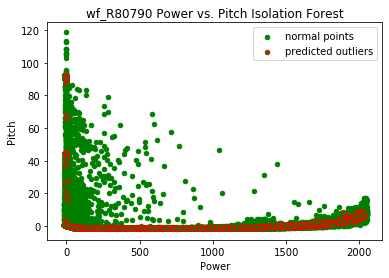

In [174]:
plt.title("wf_R80790 Power vs. Pitch Isolation Forest")
b1 = plt.scatter(wf_R80790_power_pitch_metrics['P_avg'].loc[wf_R80790_power_pitch_metrics['wf_R80790_Power_Pitch_Anomalies']==1], wf_R80790_power_pitch_metrics['Ba_avg'].loc[wf_R80790_power_pitch_metrics['wf_R80790_Power_Pitch_Anomalies']==1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(wf_R80790_power_pitch_metrics['P_avg'].loc[wf_R80790_power_pitch_metrics['wf_R80790_Power_Pitch_Anomalies']==-1], wf_R80790_power_pitch_metrics['Ba_avg'].loc[wf_R80790_power_pitch_metrics['wf_R80790_Power_Pitch_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Power')
plt.ylabel('Pitch')
plt.show()

### Next: wf_R80721

In [175]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [176]:
clf.fit(wf_R80721[['Ba_avg','P_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [177]:
wf_R80721_power_pitch_pred = clf.predict(wf_R80721[['Ba_avg','P_avg']].dropna())

In [178]:
wf_R80721_pitch_df = pd.DataFrame({'wf_R80721_Power_Pitch_Anomalies': wf_R80721_power_pitch_pred})

In [179]:
wf_R80721_pitch_df

,wf_R80721_Power_Pitch_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
106434,1
106435,1
106436,1
106437,1


In [180]:
wf_R80721[['Ba_avg','P_avg']].dropna()

,Ba_avg,P_avg
0,-0.97,113.480000
1,-1.00,99.410004
2,-0.94,77.029999
3,-0.73,53.139999
4,-1.00,100.740000
...,...,...
107126,-0.86,76.520000
107127,0.19,8.410000
107128,4.75,0.000000
107129,44.99,0.000000


In [181]:
wf_R80721_power_pitch_metrics = wf_R80721_pitch_df.join(wf_R80721[['Ba_avg','P_avg']].dropna())

In [182]:
wf_R80721_power_pitch_metrics

,wf_R80721_Power_Pitch_Anomalies,Ba_avg,P_avg
0,1,-0.97,113.480000
1,1,-1.00,99.410004
2,1,-0.94,77.029999
3,1,-0.73,53.139999
4,1,-1.00,100.740000
...,...,...,...
106434,1,NaN,NaN
106435,1,NaN,NaN
106436,1,NaN,NaN
106437,1,NaN,NaN


In [183]:
wf_R80721_power_pitch_outliers=wf_R80721_power_pitch_metrics.loc[wf_R80721_power_pitch_metrics['wf_R80721_Power_Pitch_Anomalies']==-1]
wf_R80721_power_pitch_outliers_index=list(wf_R80721_power_pitch_outliers.index)

In [184]:
#print(wf_R80721_power_pitch_outliers_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(wf_R80721_power_pitch_metrics['wf_R80721_Power_Pitch_Anomalies'].value_counts())

 1    105399
-1      1040
Name: wf_R80721_Power_Pitch_Anomalies, dtype: int64


#### Plot wf_R80721 Power & Pitch outliers vs. normal points

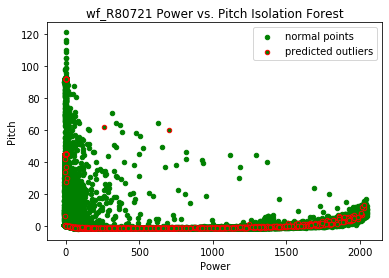

In [185]:
plt.title("wf_R80721 Power vs. Pitch Isolation Forest")
b1 = plt.scatter(wf_R80721_power_pitch_metrics['P_avg'].loc[wf_R80721_power_pitch_metrics['wf_R80721_Power_Pitch_Anomalies']==1], wf_R80721_power_pitch_metrics['Ba_avg'].loc[wf_R80721_power_pitch_metrics['wf_R80721_Power_Pitch_Anomalies']==1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(wf_R80721_power_pitch_metrics['P_avg'].loc[wf_R80721_power_pitch_metrics['wf_R80721_Power_Pitch_Anomalies']==-1], wf_R80721_power_pitch_metrics['Ba_avg'].loc[wf_R80721_power_pitch_metrics['wf_R80721_Power_Pitch_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Power')
plt.ylabel('Pitch')
plt.show()

### Next: wf_R80711

In [186]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [187]:
clf.fit(wf_R80711[['Ba_avg','P_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [188]:
wf_R80711_power_pitch_pred = clf.predict(wf_R80711[['Ba_avg','P_avg']].dropna())

In [189]:
wf_R80711_pitch_df = pd.DataFrame({'wf_R80711_Power_Pitch_Anomalies': wf_R80711_power_pitch_pred})

In [190]:
wf_R80711_pitch_df

,wf_R80711_Power_Pitch_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
106188,1
106189,1
106190,1
106191,1


In [191]:
wf_R80711[['Ba_avg','P_avg']].dropna()

,Ba_avg,P_avg
0,-0.99,397.35001
1,-0.99,301.35001
2,-0.99,298.25000
3,-0.99,399.25000
4,-0.99,284.35999
...,...,...
107126,-0.83,68.42000
107127,-0.15,27.36000
107128,0.03,20.98000
107129,0.48,0.00000


In [192]:
wf_R80711_power_pitch_metrics = wf_R80711_pitch_df.join(wf_R80711[['Ba_avg','P_avg']].dropna())

In [193]:
wf_R80711_power_pitch_metrics

,wf_R80711_Power_Pitch_Anomalies,Ba_avg,P_avg
0,1,-0.99,397.35001
1,1,-0.99,301.35001
2,1,-0.99,298.25000
3,1,-0.99,399.25000
4,1,-0.99,284.35999
...,...,...,...
106188,1,45.00,0.00000
106189,1,45.00,0.00000
106190,1,45.00,0.00000
106191,1,45.00,0.00000


In [194]:
wf_R80711_power_pitch_outliers=wf_R80711_power_pitch_metrics.loc[wf_R80711_power_pitch_metrics['wf_R80711_Power_Pitch_Anomalies']==-1]
wf_R80711_power_pitch_outliers_index=list(wf_R80711_power_pitch_outliers.index)

In [195]:
#print(wf_R80711_power_pitch_outliers_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(wf_R80711_power_pitch_metrics['wf_R80711_Power_Pitch_Anomalies'].value_counts())

 1    105142
-1      1051
Name: wf_R80711_Power_Pitch_Anomalies, dtype: int64


#### Plot wf_R80711 Power & Pitch outliers vs. normal points

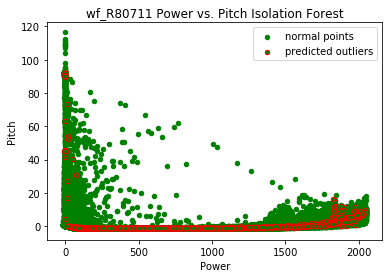

In [196]:
plt.title("wf_R80711 Power vs. Pitch Isolation Forest")
b1 = plt.scatter(wf_R80711_power_pitch_metrics['P_avg'].loc[wf_R80711_power_pitch_metrics['wf_R80711_Power_Pitch_Anomalies']==1], wf_R80711_power_pitch_metrics['Ba_avg'].loc[wf_R80711_power_pitch_metrics['wf_R80711_Power_Pitch_Anomalies']==1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(wf_R80711_power_pitch_metrics['P_avg'].loc[wf_R80711_power_pitch_metrics['wf_R80711_Power_Pitch_Anomalies']==-1], wf_R80711_power_pitch_metrics['Ba_avg'].loc[wf_R80711_power_pitch_metrics['wf_R80711_Power_Pitch_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Power')
plt.ylabel('Pitch')
plt.show()

### Next: wf_R80736

In [197]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [198]:
clf.fit(wf_R80736[['Ba_avg','P_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [199]:
wf_R80736_power_pitch_pred = clf.predict(wf_R80736[['Ba_avg','P_avg']].dropna())

In [200]:
wf_R80736_pitch_df = pd.DataFrame({'wf_R80736_Power_Pitch_Anomalies': wf_R80736_power_pitch_pred})

In [201]:
wf_R80736_pitch_df

,wf_R80736_Power_Pitch_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
106026,1
106027,1
106028,1
106029,1


In [202]:
wf_R80736[['Ba_avg','P_avg']].dropna()

,Ba_avg,P_avg
0,-0.96,131.610000
1,-0.98,155.090000
2,-0.98,101.810000
3,-0.94,73.019997
4,-0.84,59.020000
...,...,...
107126,-0.64,52.090000
107127,0.23,7.080000
107128,11.96,0.000000
107129,45.00,0.000000


In [203]:
wf_R80736_power_pitch_metrics = wf_R80736_pitch_df.join(wf_R80736[['Ba_avg','P_avg']].dropna())

In [204]:
wf_R80736_power_pitch_metrics

,wf_R80736_Power_Pitch_Anomalies,Ba_avg,P_avg
0,1,-0.96,131.610000
1,1,-0.98,155.090000
2,1,-0.98,101.810000
3,1,-0.94,73.019997
4,1,-0.84,59.020000
...,...,...,...
106026,1,-0.99,459.740000
106027,1,-0.99,505.310000
106028,1,-0.99,649.020000
106029,1,-0.99,677.980000


In [205]:
wf_R80736_power_pitch_outliers=wf_R80736_power_pitch_metrics.loc[wf_R80736_power_pitch_metrics['wf_R80736_Power_Pitch_Anomalies']==-1]
wf_R80736_power_pitch_outliers_index=list(wf_R80736_power_pitch_outliers.index)

In [206]:
#print(wf_R80736_power_pitch_outliers_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(wf_R80736_power_pitch_metrics['wf_R80736_Power_Pitch_Anomalies'].value_counts())

 1    104986
-1      1045
Name: wf_R80736_Power_Pitch_Anomalies, dtype: int64


#### Plot wf_R80736 Power & Pitch outliers vs. normal points

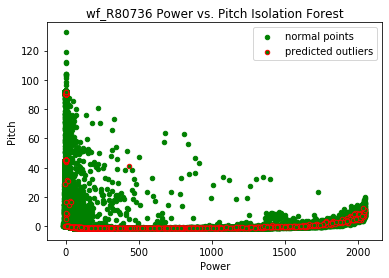

In [207]:
plt.title("wf_R80736 Power vs. Pitch Isolation Forest")
b1 = plt.scatter(wf_R80736_power_pitch_metrics['P_avg'].loc[wf_R80736_power_pitch_metrics['wf_R80736_Power_Pitch_Anomalies']==1], wf_R80736_power_pitch_metrics['Ba_avg'].loc[wf_R80736_power_pitch_metrics['wf_R80736_Power_Pitch_Anomalies']==1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(wf_R80736_power_pitch_metrics['P_avg'].loc[wf_R80736_power_pitch_metrics['wf_R80736_Power_Pitch_Anomalies']==-1], wf_R80736_power_pitch_metrics['Ba_avg'].loc[wf_R80736_power_pitch_metrics['wf_R80736_Power_Pitch_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Power')
plt.ylabel('Pitch')
plt.show()

## Compare output power vs. pitch angle for all turbines

In [208]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [209]:
clf.fit(windfarm[['Ba_avg','P_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [210]:
power_pitch_pred = clf.predict(windfarm[['Ba_avg','P_avg']].dropna())

In [211]:
power_pitch_df = pd.DataFrame({'Power_Pitch_Anomalies': power_pitch_pred})

In [212]:
power_pitch_df

,Power_Pitch_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
425145,1
425146,-1
425147,1
425148,1


In [213]:
windfarm[['Ba_avg','P_avg']].dropna()

,Ba_avg,P_avg
13872,90.00,-0.15
13875,90.00,-0.13
13878,45.00,-1.31
13881,-0.99,106.71
13884,-0.22,34.50
...,...,...
217583,1.69,1632.28
217584,6.35,1940.51
217585,-0.57,1417.71
217586,-0.83,1266.86


In [214]:
power_pitch_metrics = power_pitch_df.join(windfarm[['Ba_avg','P_avg']].dropna())

In [215]:
power_pitch_metrics

,Power_Pitch_Anomalies,Ba_avg,P_avg
0,1,44.990002,-1.89000
1,1,-1.000000,197.32001
2,1,-1.000000,176.45000
3,1,-1.000000,190.61000
4,1,44.990002,-2.88000
...,...,...,...
425145,1,NaN,NaN
425146,-1,NaN,NaN
425147,1,NaN,NaN
425148,1,NaN,NaN


In [216]:
power_pitch_outliers=power_pitch_metrics.loc[power_pitch_metrics['Power_Pitch_Anomalies']==-1]
power_pitch_outliers_index=list(power_pitch_outliers.index)

In [217]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(power_pitch_metrics['Power_Pitch_Anomalies'].value_counts())

 1    466160
-1      4670
Name: Power_Pitch_Anomalies, dtype: int64


### Plot Power & Pitch outliers vs. normal points

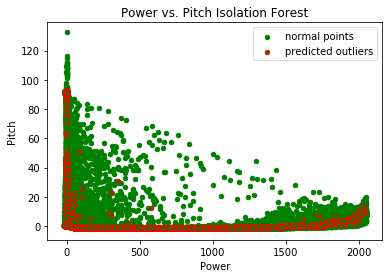

In [218]:
plt.title("Power vs. Pitch Isolation Forest")
b1 = plt.scatter(power_pitch_metrics['P_avg'].loc[power_pitch_metrics['Power_Pitch_Anomalies']==1], power_pitch_metrics['Ba_avg'].loc[power_pitch_metrics['Power_Pitch_Anomalies']==1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(power_pitch_metrics['P_avg'].loc[power_pitch_metrics['Power_Pitch_Anomalies']==-1], power_pitch_metrics['Ba_avg'].loc[power_pitch_metrics['Power_Pitch_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Power')
plt.ylabel('Pitch')
plt.show()

## Compare output power vs. rotor speed


In [219]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [220]:
clf.fit(windfarm[['Rs_avg','P_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [221]:
power_rs_pred = clf.predict(windfarm[['Rs_avg','P_avg']].dropna())

In [222]:
power_rs_df = pd.DataFrame({'Power_RotorSp_Anomalies': power_rs_pred})

In [223]:
power_rs_df

,Power_RotorSp_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
422521,1
422522,-1
422523,1
422524,1


In [224]:
windfarm[['Rs_avg','P_avg']].dropna()

,Rs_avg,P_avg
13872,0.000000,-0.15
13875,0.000000,-0.13
13878,0.860000,-1.31
13881,9.970000,106.71
13884,9.229999,34.50
...,...,...
217583,17.140000,1632.28
217584,17.180000,1940.51
217585,17.150000,1417.71
217586,17.140000,1266.86


In [225]:
power_rs_metrics = power_rs_df.join(windfarm[['Rs_avg','P_avg']].dropna())

In [226]:
power_rs_metrics

,Power_RotorSp_Anomalies,Rs_avg,P_avg
0,1,0.33,-1.89000
1,1,11.48,197.32001
2,1,11.25,176.45000
3,1,11.43,190.61000
4,1,1.52,-2.88000
...,...,...,...
422521,1,NaN,NaN
422522,-1,12.27,245.37000
422523,1,NaN,NaN
422524,1,NaN,NaN


In [227]:
power_rs_outliers=power_rs_metrics.loc[power_rs_metrics['Power_RotorSp_Anomalies']==-1]
power_rs_outliers_index=list(power_rs_outliers.index)

In [228]:
power_rs_outliers_index=list(power_rs_outliers.index)

In [229]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(power_rs_metrics['Power_RotorSp_Anomalies'].value_counts())

 1    463091
-1      4537
Name: Power_RotorSp_Anomalies, dtype: int64


### Plot Power & Rotor Speed outliers vs. normal points

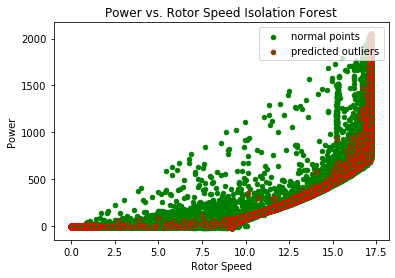

In [230]:
plt.title("Power vs. Rotor Speed Isolation Forest")
b1 = plt.scatter(power_rs_metrics['Rs_avg'].loc[power_rs_metrics['Power_RotorSp_Anomalies']==1], power_rs_metrics['P_avg'].loc[power_rs_metrics['Power_RotorSp_Anomalies']==1], c='green',s=20,label="normal points")
b1 =plt.scatter(power_rs_metrics['Rs_avg'].loc[power_rs_metrics['Power_RotorSp_Anomalies']==-1], power_rs_metrics['P_avg'].loc[power_rs_metrics['Power_RotorSp_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Rotor Speed')
plt.ylabel('Power')
plt.show()

## Univariate Anomaly Detection on Active_power (kW) Output

In [250]:
isolation_forest=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [251]:
isolation_forest.fit(wf_R80721['P_avg'].dropna().values.reshape(-1, 1))

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [252]:
xx = np.linspace(wf_R80721['P_avg'].min(), wf_R80721['P_avg'].max(), len(wf_R80721)).reshape(-1,1)

In [253]:
power_anomaly_score = isolation_forest.decision_function(xx)

In [254]:
power_outlier = isolation_forest.predict(xx)

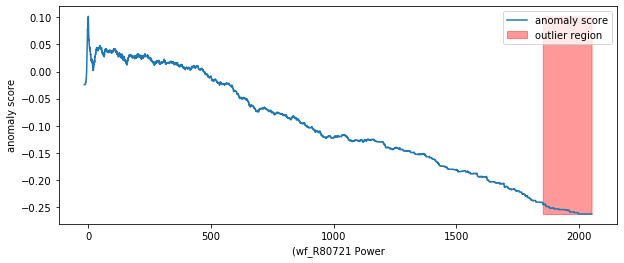

In [255]:
plt.figure(figsize=(10,4))
plt.plot(xx, power_anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(power_anomaly_score), np.max(power_anomaly_score), 
                 where=power_outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('(wf_R80721 Power')
plt.show();

In [256]:
isolation_forest=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [257]:
isolation_forest.fit(wf_R80711['P_avg'].dropna().values.reshape(-1, 1))

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [258]:
xx = np.linspace(wf_R80711['P_avg'].min(), wf_R80711['P_avg'].max(), len(wf_R80711)).reshape(-1,1)

In [259]:
power_anomaly_score = isolation_forest.decision_function(xx)

In [260]:
power_outlier = isolation_forest.predict(xx)

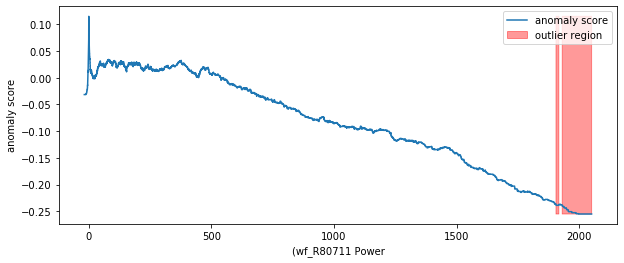

In [261]:
plt.figure(figsize=(10,4))
plt.plot(xx, power_anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(power_anomaly_score), np.max(power_anomaly_score), 
                 where=power_outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('(wf_R80711 Power')
plt.show();

In [262]:
isolation_forest=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [263]:
isolation_forest.fit(wf_R80736['P_avg'].dropna().values.reshape(-1, 1))

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [264]:
xx = np.linspace(wf_R80736['P_avg'].min(), wf_R80736['P_avg'].max(), len(wf_R80736)).reshape(-1,1)

In [265]:
power_anomaly_score = isolation_forest.decision_function(xx)

In [266]:
power_outlier = isolation_forest.predict(xx)

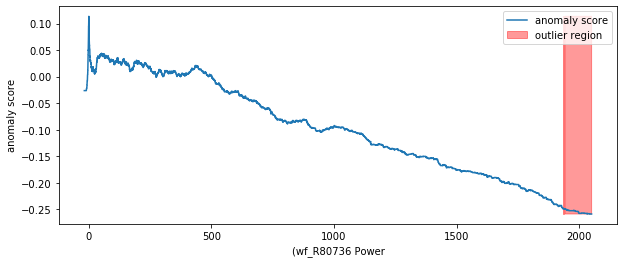

In [267]:
plt.figure(figsize=(10,4))
plt.plot(xx, power_anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(power_anomaly_score), np.max(power_anomaly_score), 
                 where=power_outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('(wf_R80736 Power')
plt.show();

In [268]:
isolation_forest=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [269]:
isolation_forest.fit(wf_R80736['P_avg'].dropna().values.reshape(-1, 1))

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [270]:
xx = np.linspace(wf_R80736['P_avg'].min(), wf_R80736['P_avg'].max(), len(wf_R80736)).reshape(-1,1)

In [271]:
power_anomaly_score = isolation_forest.decision_function(xx)

In [272]:
power_outlier = isolation_forest.predict(xx)

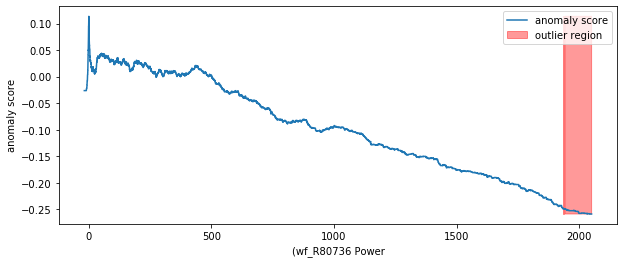

In [273]:
plt.figure(figsize=(10,4))
plt.plot(xx, power_anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(power_anomaly_score), np.max(power_anomaly_score), 
                 where=power_outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('(wf_R80736 Power')
plt.show();

In [231]:
isolation_forest=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [232]:
isolation_forest.fit(windfarm['P_avg'].dropna().values.reshape(-1, 1))


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [233]:
xx = np.linspace(windfarm['P_avg'].min(), windfarm['P_avg'].max(), len(windfarm)).reshape(-1,1)

In [234]:
power_anomaly_score = isolation_forest.decision_function(xx)

In [235]:
power_outlier = isolation_forest.predict(xx)

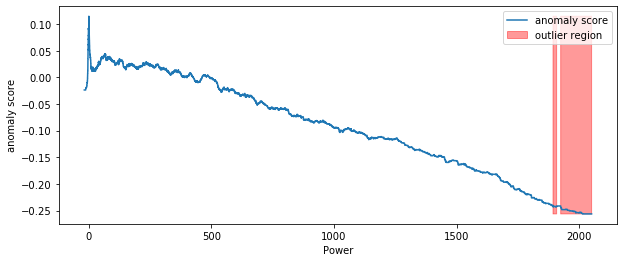

In [236]:
plt.figure(figsize=(10,4))
plt.plot(xx, power_anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(power_anomaly_score), np.max(power_anomaly_score), 
                 where=power_outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Power')
plt.show();

## Observations:
- According to the above results and visualization, it seems that Active_Power exceeing 1450 kw would definitely be considered outliers.
- This is consistent with the Power & Pitch outliers vs. normal points plots above

## Compare output power vs. rotor speed

In [237]:
clf=IsolationForest(n_estimators=100, max_samples=100, contamination=float(.01), \
                        max_features=2, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [238]:
clf.fit(windfarm[['Ws_avg','P_avg']].dropna())

IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=2, max_samples=100, n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=False)

In [239]:
power_ws_pred = clf.predict(windfarm[['Rs_avg','P_avg']].dropna())

In [240]:
power_ws_df = pd.DataFrame({'Power_WindSpeed_Anomalies': power_ws_pred})

In [241]:
power_ws_df

,Power_WindSpeed_Anomalies
0,1
1,1
2,1
3,1
4,1
...,...
422521,1
422522,-1
422523,1
422524,1


In [242]:
windfarm[['Ws_avg','P_avg']].dropna()

,Ws_avg,P_avg
13872,0.00,-0.15
13875,0.00,-0.13
13878,1.33,-1.31
13881,5.04,106.71
13884,3.58,34.50
...,...,...
217583,12.01,1632.28
217584,13.69,1940.51
217585,10.31,1417.71
217586,9.48,1266.86


In [243]:
power_ws_metrics = power_ws_df.join(windfarm[['Ws_avg','P_avg']].dropna())

In [244]:
power_ws_metrics

,Power_WindSpeed_Anomalies,Ws_avg,P_avg
0,1,0.18,-1.89000
1,1,4.85,197.32001
2,1,5.04,176.45000
3,1,5.31,190.61000
4,1,3.15,-2.88000
...,...,...,...
422521,1,NaN,NaN
422522,-1,5.41,245.37000
422523,1,NaN,NaN
422524,1,NaN,NaN


In [245]:
power_ws_outliers=power_ws_metrics.loc[power_ws_metrics['Power_WindSpeed_Anomalies']==-1]
power_ws_outliers_index=list(power_ws_outliers.index)

In [246]:
power_ws_outliers_index=list(power_ws_outliers.index)

In [247]:
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(power_ws_metrics['Power_WindSpeed_Anomalies'].value_counts())

 1    459581
-1      8669
Name: Power_WindSpeed_Anomalies, dtype: int64


### Plot Power & Wind Speed outliers vs. normal points

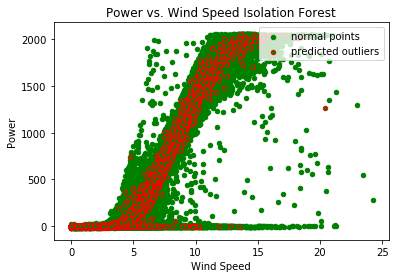

In [248]:
plt.title("Power vs. Wind Speed Isolation Forest")
b1 = plt.scatter(power_ws_metrics['Ws_avg'].loc[power_ws_metrics['Power_WindSpeed_Anomalies']==1], power_ws_metrics['P_avg'].loc[power_ws_metrics['Power_WindSpeed_Anomalies']==1], c='green',s=20,label="normal points")
b1 =plt.scatter(power_ws_metrics['Ws_avg'].loc[power_ws_metrics['Power_WindSpeed_Anomalies']==-1], power_ws_metrics['P_avg'].loc[power_ws_metrics['Power_WindSpeed_Anomalies']==-1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

# Further Isolation Forest readings:
- https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2
- https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e
- https://lambda.grofers.com/anomaly-detection-using-isolation-forest-80b3a3d1a9d8
- https://www.kaggle.com/kpriyanshu256/anomaly-detection-using-isolation-forest
- [WindTurbineClassification](https://github.com/nmstreethran/WindTurbineClassification)